In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [2]:
df1 = pd.read_csv(r"C:\Users\Sandeep\Downloads\weather_prediction_bbq_labels.csv")
df = pd.read_csv(r"C:\Users\Sandeep\OneDrive\Desktop\new_hotel\weather_prediction_dataset.csv")

In [3]:
df.head(6)

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  20000101      1                  8            0.89          1.0286   
1  20000102      1                  8            0.87          1.0318   
2  20000103      1                  5            0.81          1.0314   
3  20000104      1                  7            0.79          1.0262   
4  20000105      1                  5            0.90          1.0246   
5  20000106      1                  3            0.85          1.0244   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.20                 0.03             0.0   
1                    0.25                 0.00             0.0   
2                    0.50                 0.00             3.7   
3                    0.63                 0.35             6.9   
4                    0.51                 0.07             3.7   
5                    0.56                 0.00             5.7   

   BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_min  \
0              2.9             1.6  ...                -9.3   
1              3.6             2.7  ...                 0.5   
2              2.2             0.1  ...                -1.0   
3              3.9             0.5  ...                 2.5   
4              6.0             3.8  ...                -1.8   
5              4.2             1.9  ...                -0.6   

   STOCKHOLM_temp_max  TOURS_wind_speed  TOURS_humidity  TOURS_pressure  \
0                 0.7               1.6            0.97          1.0275   
1                 2.0               2.0            0.99          1.0293   
2                 2.8               3.4            0.91          1.0267   
3                 4.6               4.9            0.95          1.0222   
4                 2.9               3.6            0.95          1.0209   
5                 4.0               3.4            0.92          1.0209   

   TOURS_global_radiation  TOURS_precipitation  TOURS_temp_mean  \
0                    0.25                 0.04              8.5   
1                    0.17                 0.16              7.9   
2                    0.27                 0.00              8.1   
3                    0.11                 0.44              8.6   
4                    0.39                 0.04              8.0   
5                    0.55                 0.20              7.1   

   TOURS_temp_min  TOURS_temp_max  
0             7.2             9.8  
1             6.6             9.2  
2             6.6             9.6  
3             6.4            10.8  
4             6.4             9.5  
5             3.5            10.7  

[6 rows x 165 columns]

In [4]:
df1.head(6)

DATE  BASEL_BBQ_weather  BUDAPEST_BBQ_weather  DE_BBQ_weather  \
0  20000101              False                 False           False   
1  20000102              False                 False           False   
2  20000103              False                 False           False   
3  20000104              False                 False           False   
4  20000105              False                 False           False   
5  20000106              False                 False           False   

   DRESDEN_BBQ_weather  DUSSELDORF_BBQ_weather  HEATHROW_BBQ_weather  \
0                False                   False                 False   
1                False                   False                 False   
2                False                   False                 False   
3                False                   False                 False   
4                False                   False                 False   
5                False                   False                 False   

   KASSEL_BBQ_weather  LJUBLJANA_BBQ_weather  MAASTRICHT_BBQ_weather  \
0               False                  False                   False   
1               False                  False                   False   
2               False                  False                   False   
3               False                  False                   False   
4               False                  False                   False   
5               False                  False                   False   

   MALMO_BBQ_weather  MONTELIMAR_BBQ_weather  MUENCHEN_BBQ_weather  \
0              False                   False                 False   
1              False                   False                 False   
2              False                   False                 False   
3              False                   False                 False   
4              False                   False                 False   
5              False                   False                 False   

   OSLO_BBQ_weather  PERPIGNAN_BBQ_weather  SONNBLICK_BBQ_weather  \
0             False                  False                  False   
1             False                  False                  False   
2             False                  False                  False   
3             False                  False                  False   
4             False                  False                  False   
5             False                  False                  False   

   STOCKHOLM_BBQ_weather  TOURS_BBQ_weather  
0                  False              False  
1                  False              False  
2                  False              False  
3                  False              False  
4                  False              False  
5                  False              False

In [5]:
df.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min',
       ...
       'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'TOURS_wind_speed',
       'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation',
       'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min',
       'TOURS_temp_max'],
      dtype='object', length=165)

In [6]:
df = df[['DATE', 'DRESDEN_cloud_cover', 'DRESDEN_wind_speed', 'DRESDEN_wind_gust',
       'DRESDEN_humidity', 'DRESDEN_global_radiation', 'DRESDEN_precipitation',
       'DRESDEN_sunshine', 'DRESDEN_temp_mean', 'DRESDEN_temp_min',
       'DRESDEN_temp_max']]

In [7]:
df1.columns

Index(['DATE', 'BASEL_BBQ_weather', 'BUDAPEST_BBQ_weather', 'DE_BBQ_weather',
       'DRESDEN_BBQ_weather', 'DUSSELDORF_BBQ_weather', 'HEATHROW_BBQ_weather',
       'KASSEL_BBQ_weather', 'LJUBLJANA_BBQ_weather', 'MAASTRICHT_BBQ_weather',
       'MALMO_BBQ_weather', 'MONTELIMAR_BBQ_weather', 'MUENCHEN_BBQ_weather',
       'OSLO_BBQ_weather', 'PERPIGNAN_BBQ_weather', 'SONNBLICK_BBQ_weather',
       'STOCKHOLM_BBQ_weather', 'TOURS_BBQ_weather'],
      dtype='object')

In [8]:
df['BBQ'] = df1['DRESDEN_BBQ_weather'];


In [9]:
df.head()

DATE  DRESDEN_cloud_cover  DRESDEN_wind_speed  DRESDEN_wind_gust  \
0  20000101                    8                 3.2                7.2   
1  20000102                    7                 4.0                8.8   
2  20000103                    7                 5.4               12.1   
3  20000104                    8                 6.0               14.4   
4  20000105                    2                 5.6               15.8   

   DRESDEN_humidity  DRESDEN_global_radiation  DRESDEN_precipitation  \
0              0.89                      0.09                   0.32   
1              0.89                      0.23                   0.00   
2              0.79                      0.18                   0.00   
3              0.88                      0.11                   0.22   
4              0.76                      0.49                   0.00   

   DRESDEN_sunshine  DRESDEN_temp_mean  DRESDEN_temp_min  DRESDEN_temp_max  \
0               0.0                1.0              -1.8               2.0   
1               0.4                2.5               1.4               4.0   
2               0.0                4.2               1.3               5.1   
3               0.0                4.4               3.4               5.2   
4               5.7                1.8              -0.5               6.9   

     BBQ  
0  False  
1  False  
2  False  
3  False  
4  False

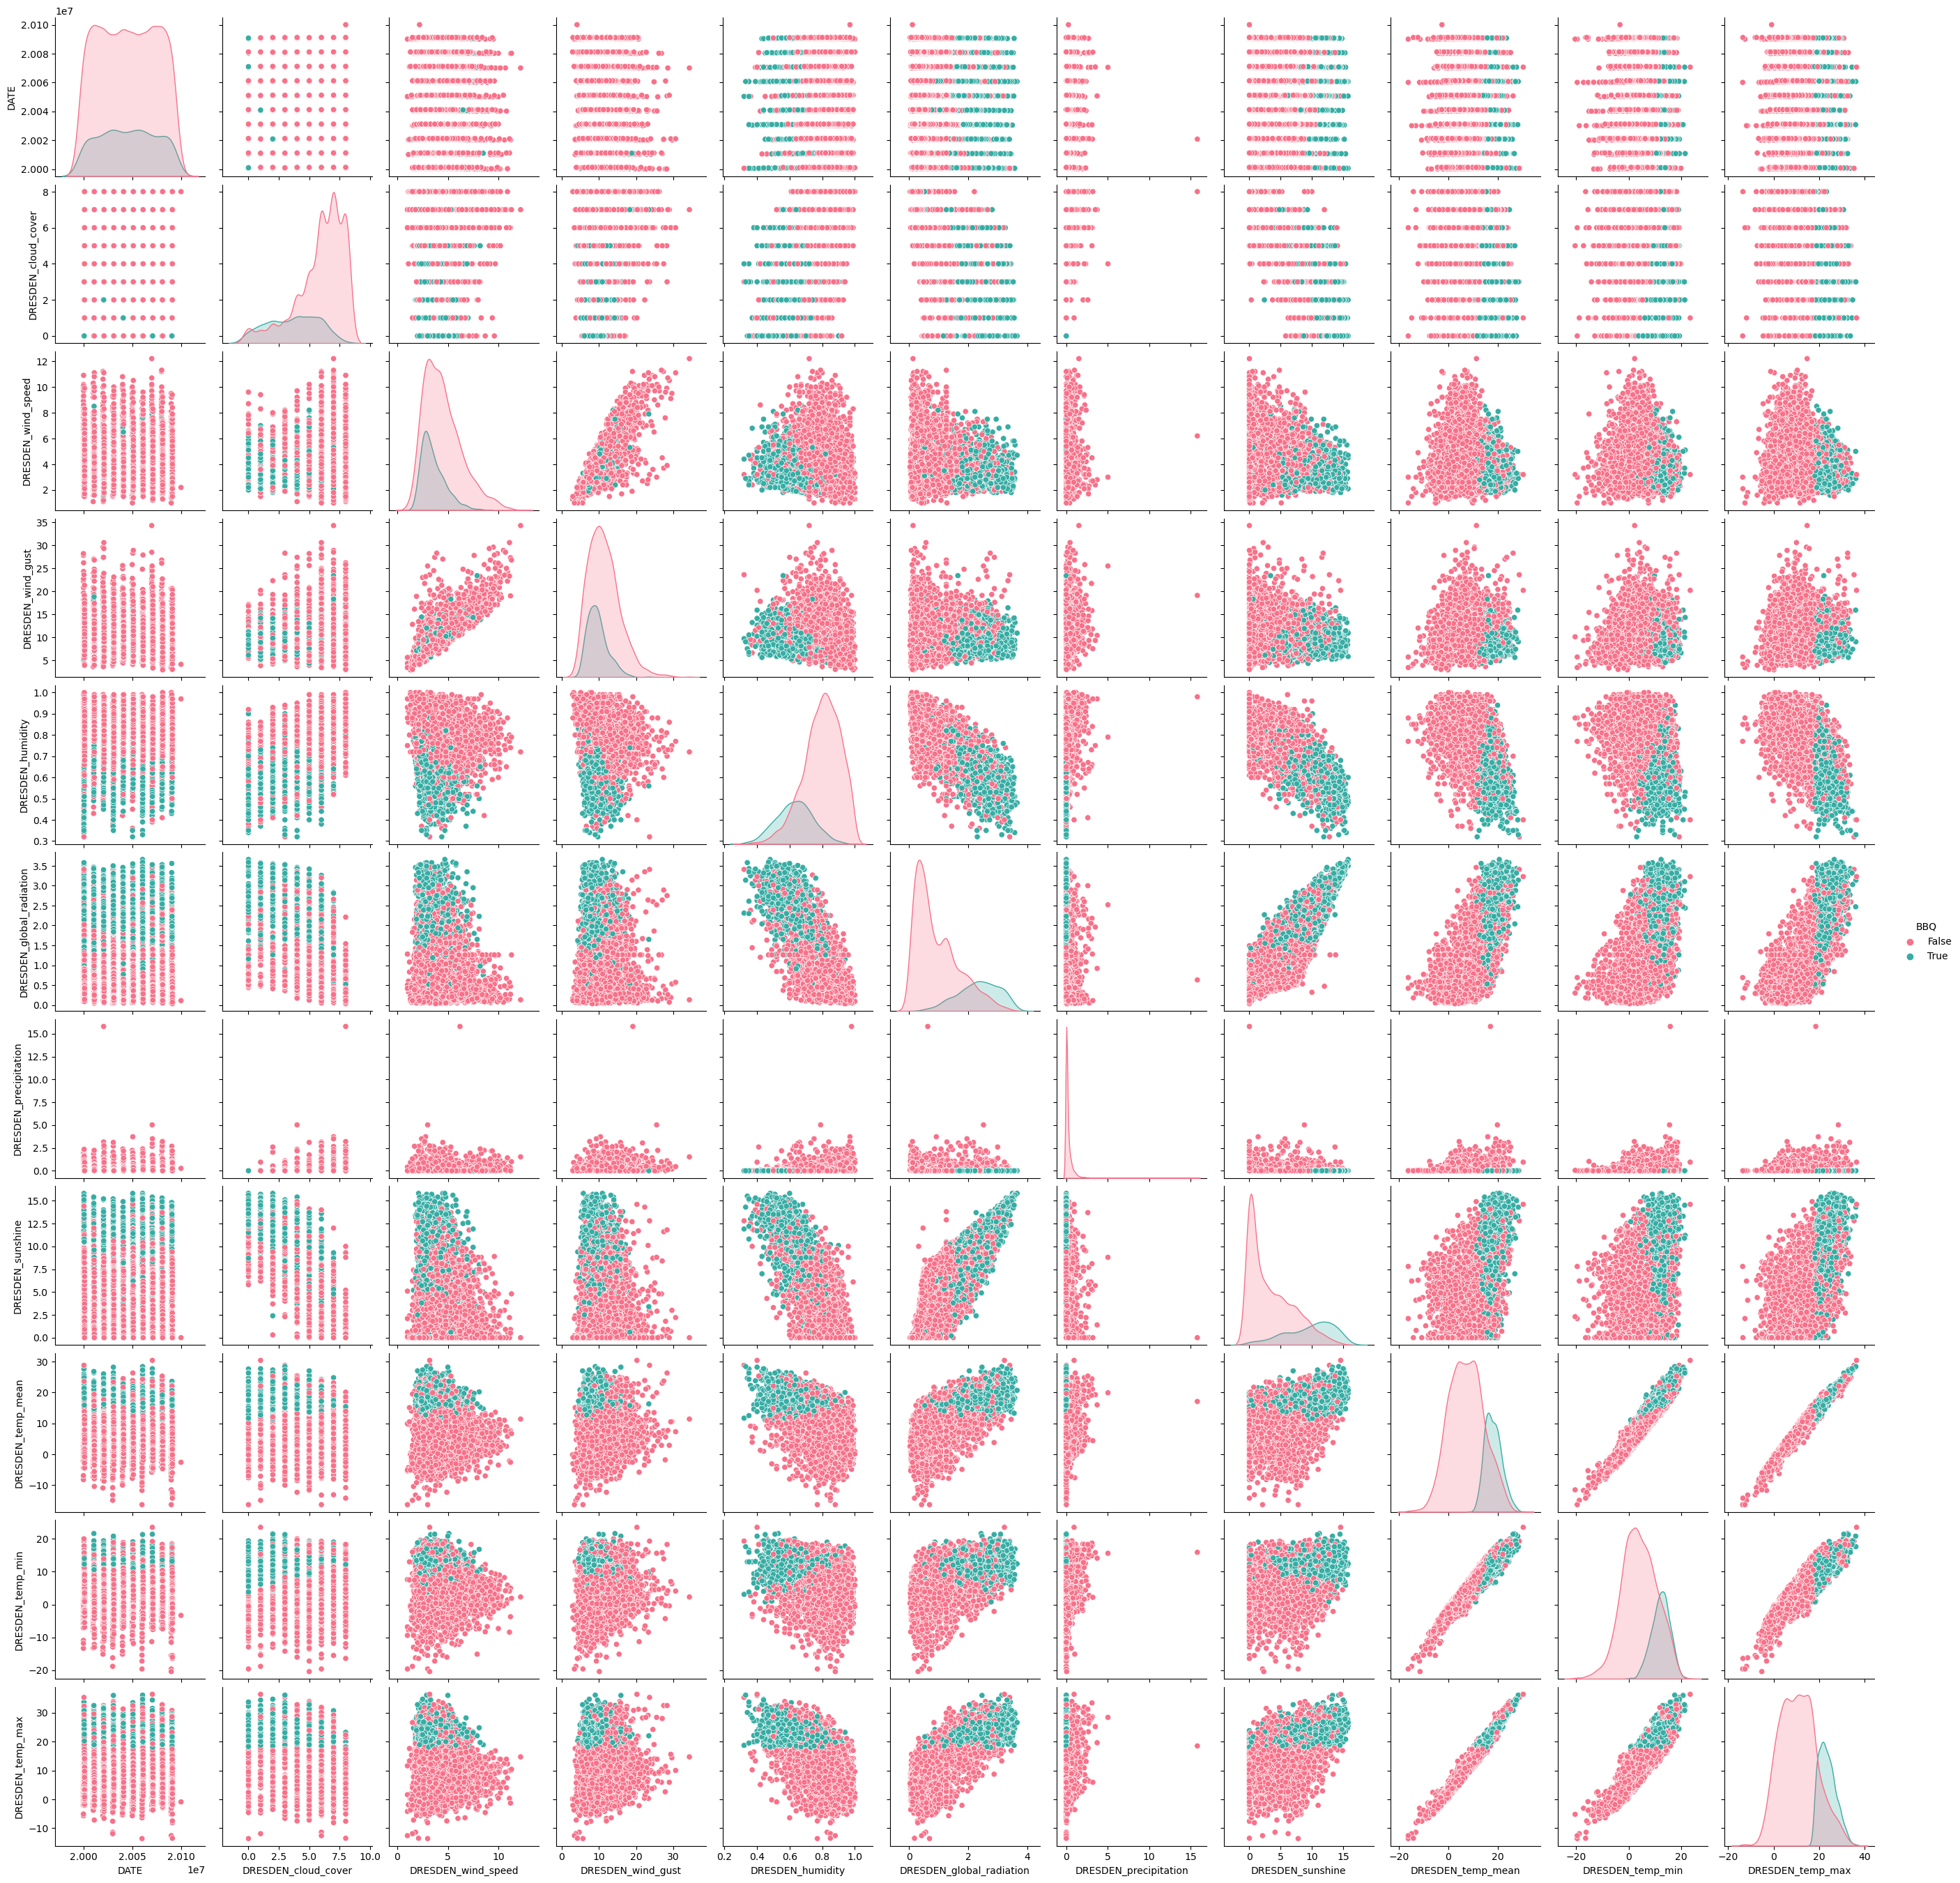

In [10]:
sns.pairplot(df,hue = "BBQ",palette = "husl")
plt.title = "pairplot of weather variables"
plt.show()

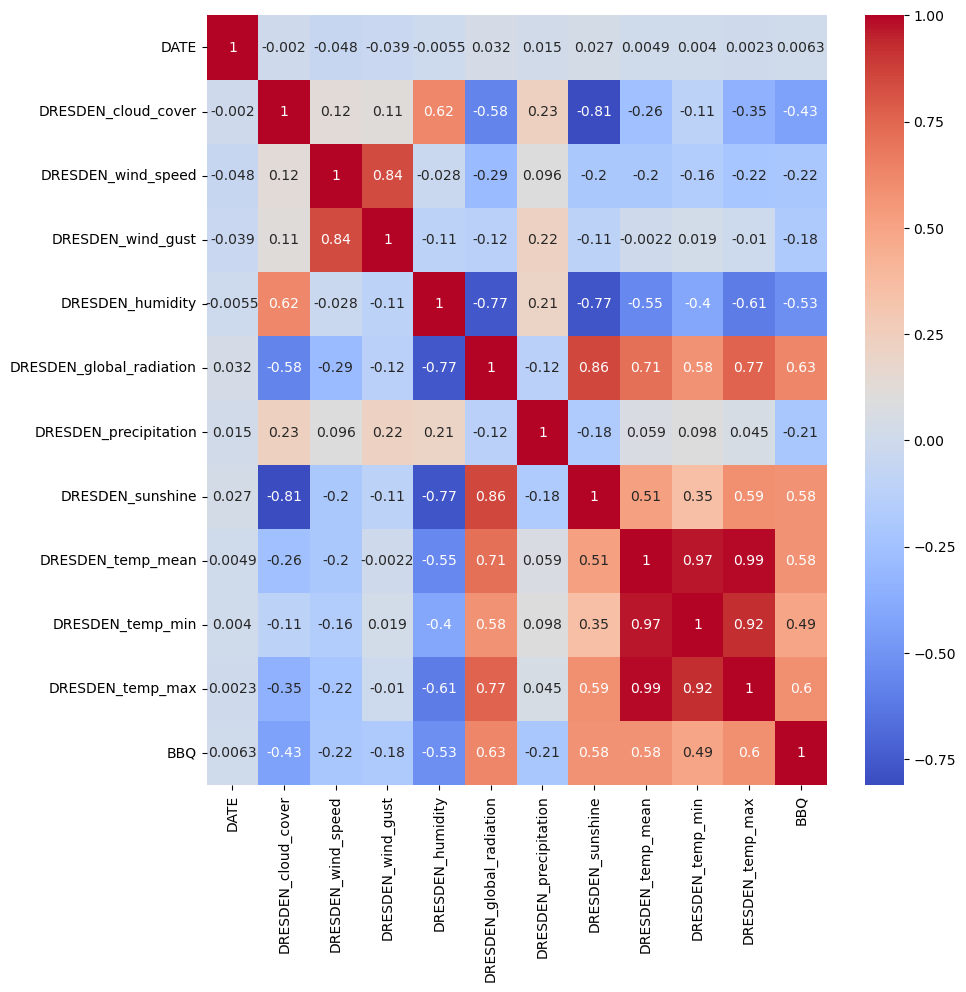

In [11]:
plt.figure (figsize = (10,10))
sns.heatmap(df.corr(),annot =True,cmap = "coolwarm")
plt.title="correlation"
plt.show()

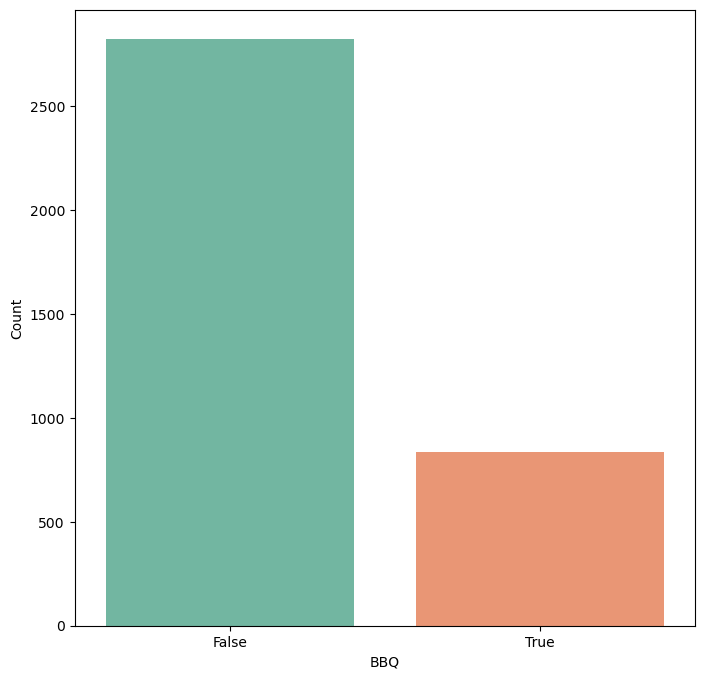

In [12]:
plt.figure (figsize = (8,8))
sns.countplot(data = df , x ='BBQ' , palette = 'Set2')
plt.title = 'bbq occurance'
plt.xlabel ('BBQ')
plt.ylabel('Count')
plt.show()

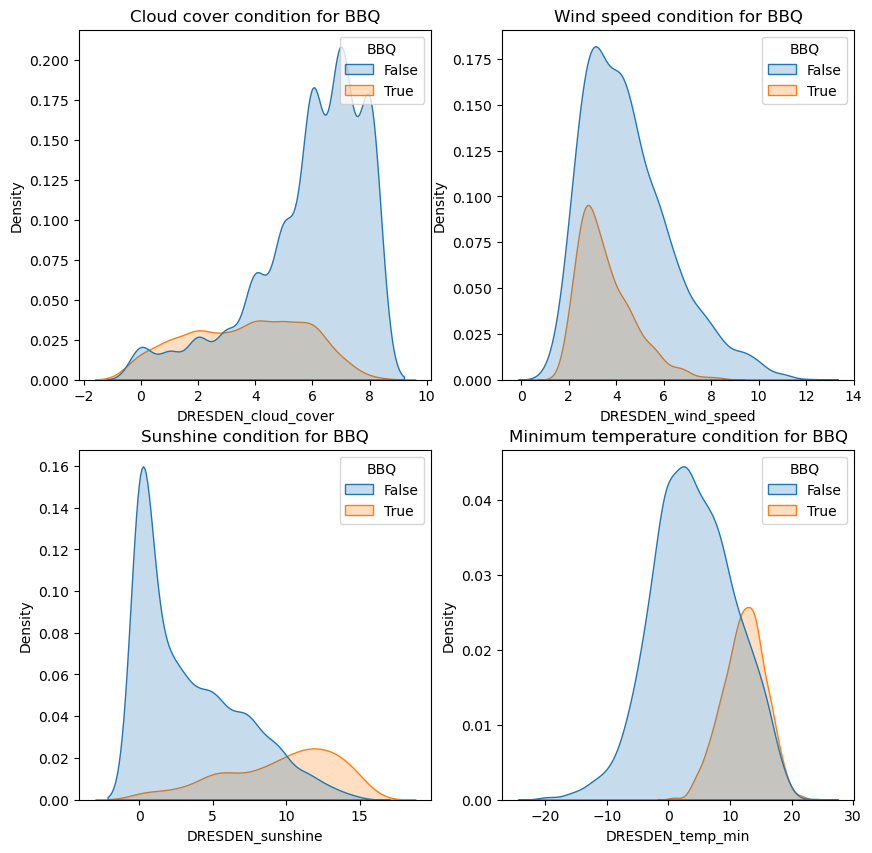

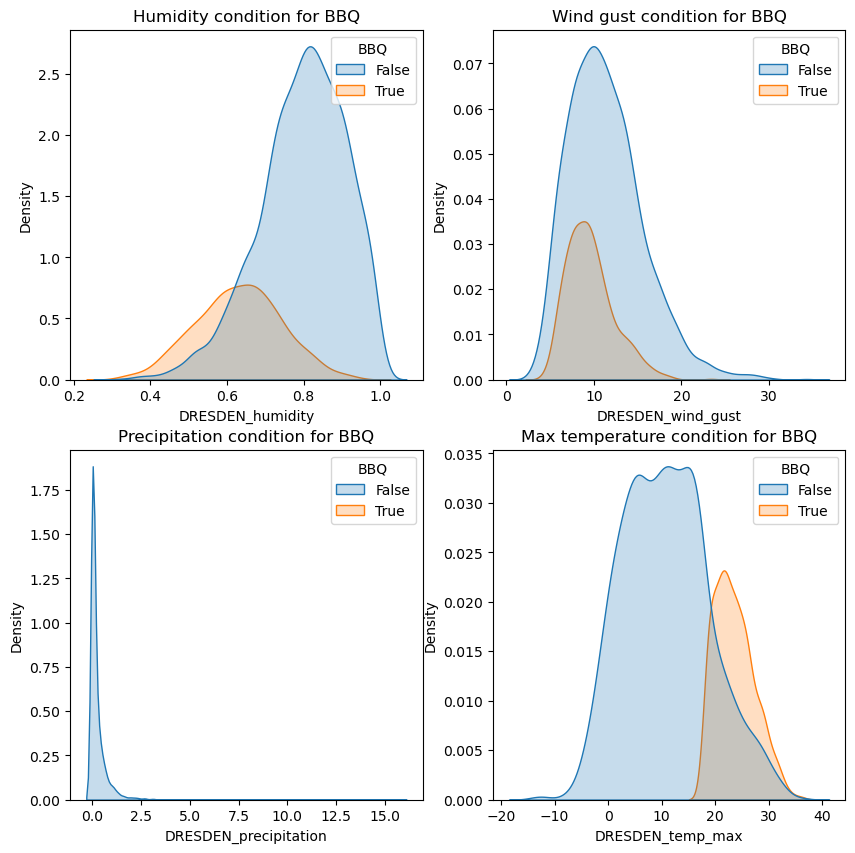

In [13]:
fig, axs = plt.subplots(2,2, figsize = (10,10))
sns.kdeplot(data = df, x='DRESDEN_cloud_cover', hue = 'BBQ', fill = True, ax = axs[0,0])
axs[0,0].set_title('Cloud cover condition for BBQ')
sns.kdeplot(data = df, x='DRESDEN_wind_speed', hue = 'BBQ', fill = True, ax = axs[0,1])
axs[0,1].set_title('Wind speed condition for BBQ')
sns.kdeplot(data = df, x='DRESDEN_sunshine', hue = 'BBQ', fill = True, ax = axs[1,0])
axs[1,0].set_title('Sunshine condition for BBQ')
sns.kdeplot(data = df, x='DRESDEN_temp_min', hue = 'BBQ', fill = True, ax = axs[1,1])
axs[1,1].set_title('Minimum temperature condition for BBQ')

fig, axs = plt.subplots(2,2, figsize = (10,10))
sns.kdeplot(data = df, x='DRESDEN_humidity', hue = 'BBQ', fill = True, ax = axs[0,0])
axs[0,0].set_title('Humidity condition for BBQ')

sns.kdeplot(data = df, x='DRESDEN_wind_gust', hue = 'BBQ', fill = True, ax = axs[0,1])
axs[0,1].set_title('Wind gust condition for BBQ')

sns.kdeplot(data = df, x='DRESDEN_precipitation', hue = 'BBQ', fill = True, ax = axs[1,0])
axs[1,0].set_title('Precipitation condition for BBQ')

sns.kdeplot(data = df, x='DRESDEN_temp_max', hue = 'BBQ', fill = True, ax = axs[1,1])
axs[1,1].set_title('Max temperature condition for BBQ')


plt.show()

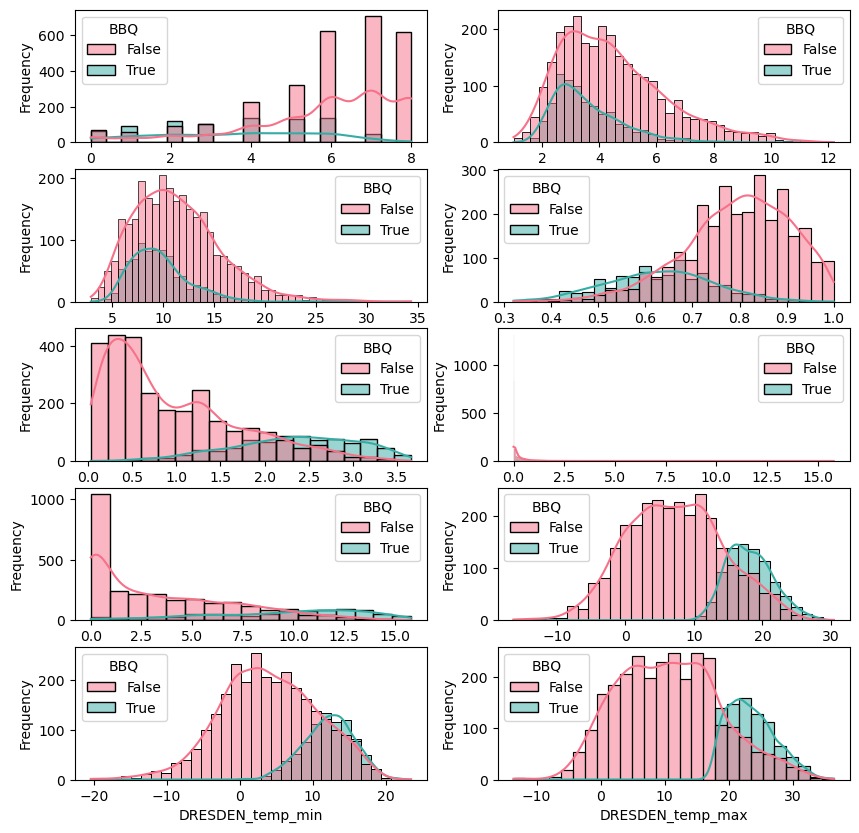

In [14]:
plt.figure (figsize = (10,10))
plots =  ['DRESDEN_cloud_cover', 'DRESDEN_wind_speed', 'DRESDEN_wind_gust',
             'DRESDEN_humidity', 'DRESDEN_global_radiation', 'DRESDEN_precipitation',
             'DRESDEN_sunshine', 'DRESDEN_temp_mean', 'DRESDEN_temp_min', 'DRESDEN_temp_max']

for i , var in enumerate (plots ,1):
    plt.subplot(5,2,i)
    sns.histplot(data = df , x= var,kde =True , hue = 'BBQ',palette = 'husl')
    plt.title= "f'Distribution of {var}'"
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.show()

In [15]:
df['BBQ'] = df['BBQ'].map({True:1, False:0});

In [16]:
X = df.drop(['DATE','BBQ'], axis = 1)
y = df['BBQ']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 28)
len(X_train), len(X_test)

(2923, 731)

In [19]:
model = Sequential([
    Dense(X_train.shape[1], activation="relu"),
    Dense(int(X_train.shape[1] / 2), activation="relu"),  # Cast to int
    Dense(1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(x=X_train, y=y_train, epochs=150, validation_split=0.2, verbose=0)

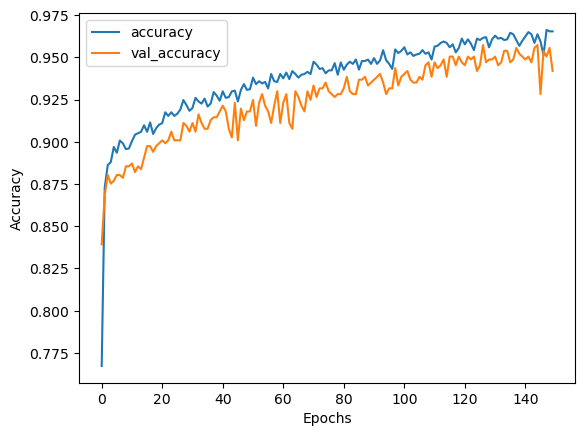

In [27]:
model_loss_acc = pd.DataFrame(model.history.history)

# Plot loss and validation loss
model_loss_acc[['loss', 'val_loss']].plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Plot accuracy and validation accuracy
model_loss_acc[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [28]:
predictions = np.round(model.predict(X_test))
print(classification_report(y_test,predictions))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       574
           1       0.96      0.90      0.93       157

    accuracy                           0.97       731
   macro avg       0.97      0.94      0.95       731
weighted avg       0.97      0.97      0.97       731



In [31]:
ann_acc = accuracy_score(y_test, predictions)
ann_acc

0.9699042407660738